In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [5]:
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [6]:
print('Amount details of the fraudulent transaction')
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [7]:
print('details of valid transaction')
valid.Amount.describe()


details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

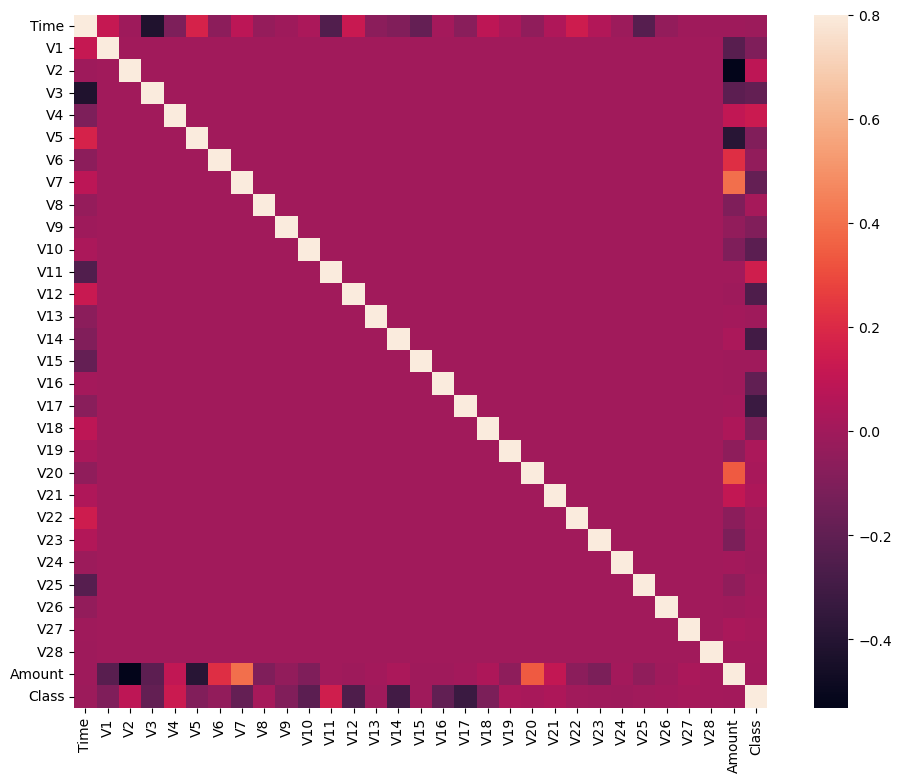

In [8]:

corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


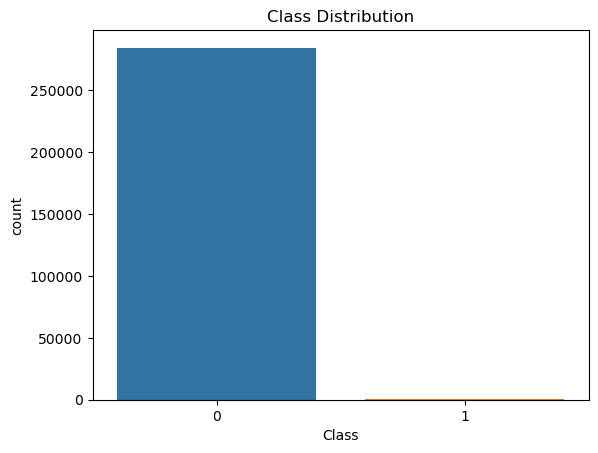

In [9]:
sns.countplot(x='Class', data=data)
plt.title('Class Distribution')
plt.show()


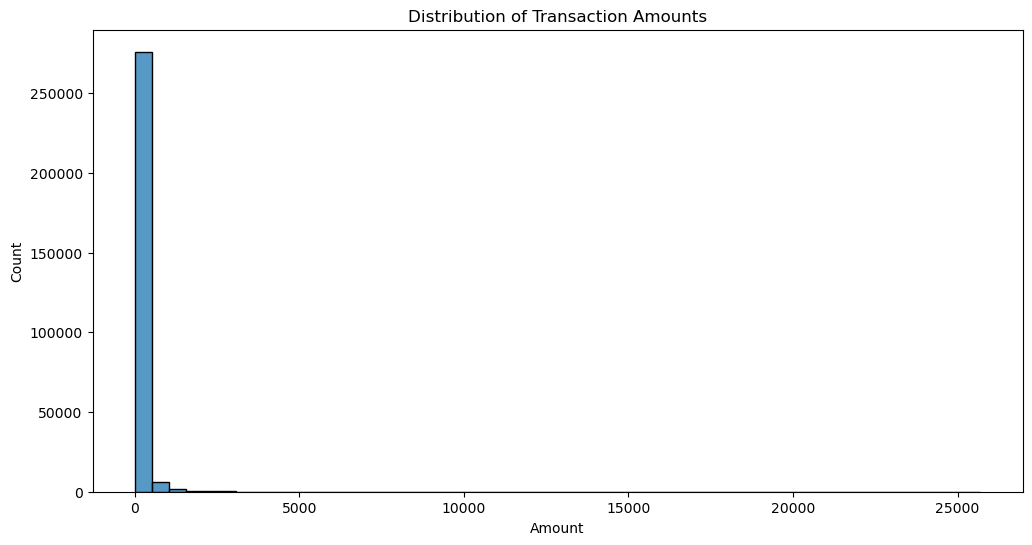

In [10]:
plt.figure(figsize=(12,6))
sns.histplot(data['Amount'], bins=50)
plt.title('Distribution of Transaction Amounts')
plt.show()


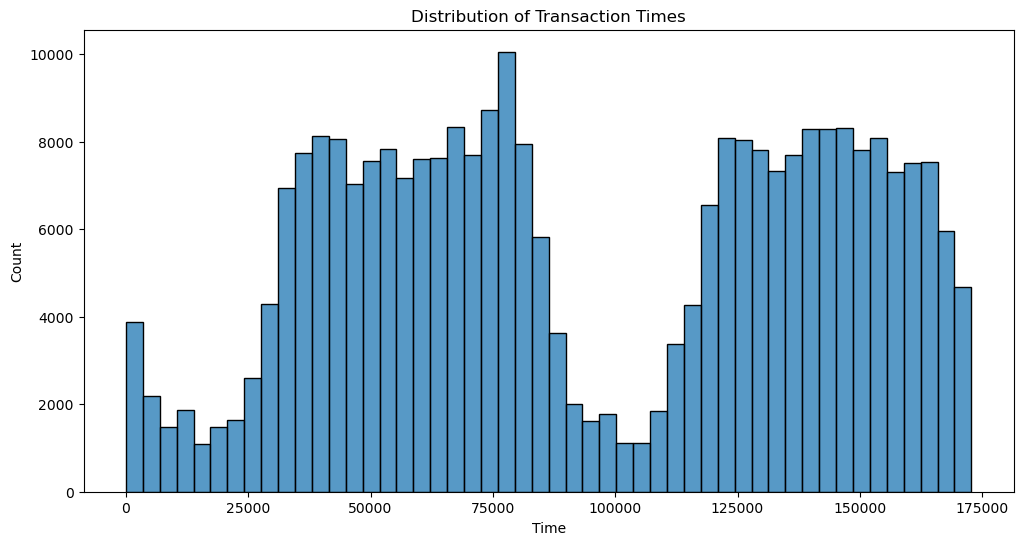

In [11]:
plt.figure(figsize=(12,6))
sns.histplot(data['Time'], bins=50)
plt.title('Distribution of Transaction Times')
plt.show()


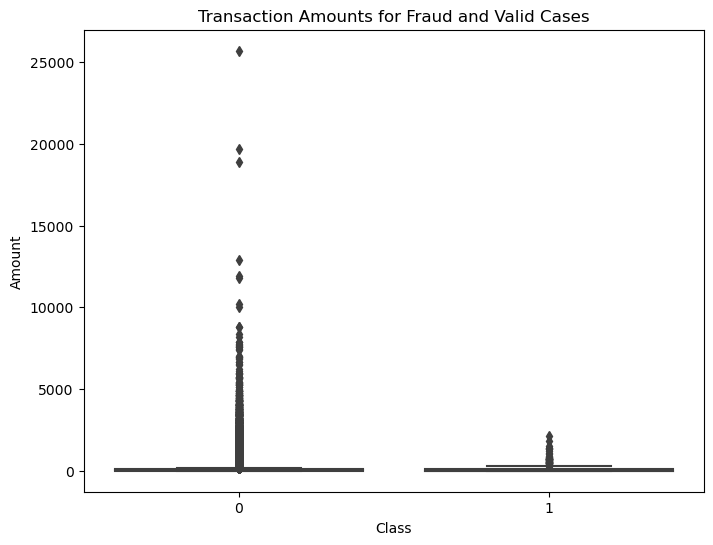

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amounts for Fraud and Valid Cases')
plt.show()


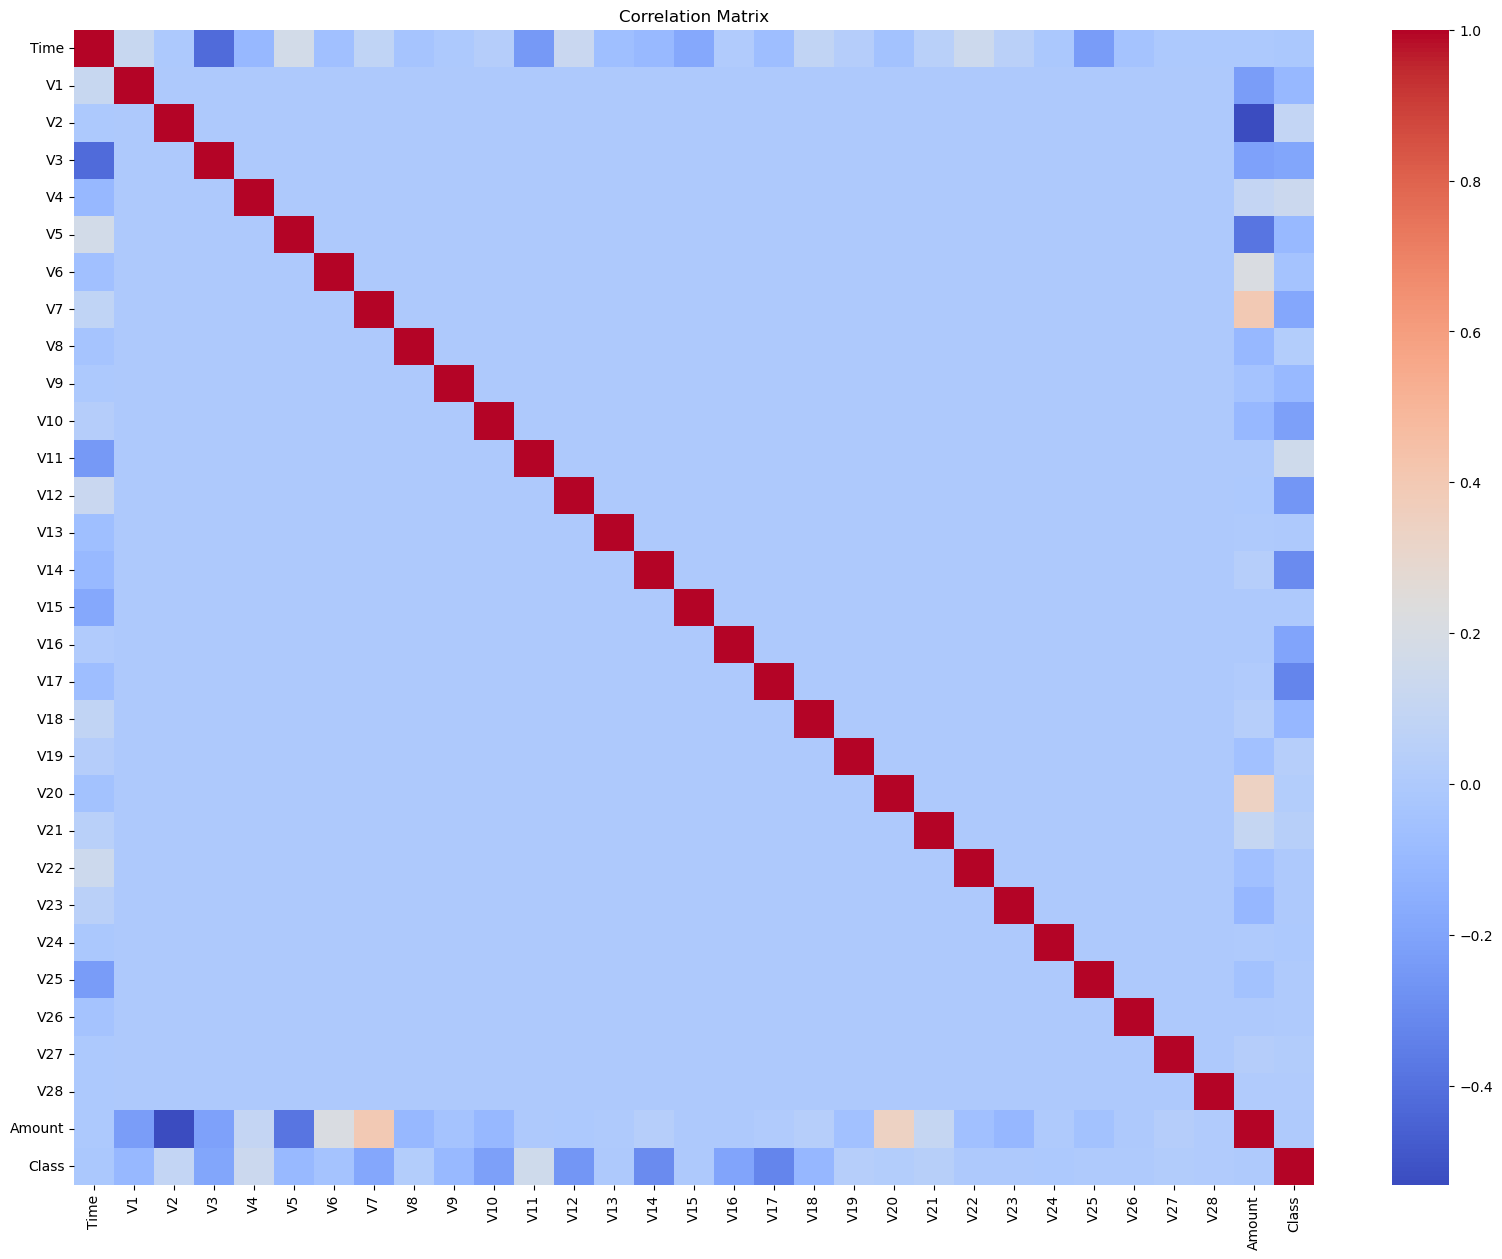

In [13]:
correlation_matrix = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


In [14]:
# selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
# sns.pairplot(data[selected_features], hue='Class', diag_kind='kde')
# plt.show()


In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

model = XGBClassifier(scale_pos_weight=len(data[data['Class'] == 0]) / len(data[data['Class'] == 1]))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score: ", roc_auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589

ROC-AUC Score:  0.9996006999495003


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())


Cross-validated ROC-AUC scores: [0.99954723 0.99998581 0.9999093  0.99999245 0.99989186]
Mean ROC-AUC: 0.9998653292520447


In [19]:
unseen_data = pd.read_csv("synthetic_unseen_credit_data.csv")
X_unseen = unseen_data.drop('Class', axis=1)
y_unseen = unseen_data['Class']

y_unseen_pred = model.predict(X_unseen)
roc_auc_unseen = roc_auc_score(y_unseen, y_unseen_pred)

print(classification_report(y_unseen, y_unseen_pred))
print("ROC-AUC Score for Unseen Data: ", roc_auc_unseen)


              precision    recall  f1-score   support

           0       0.50      0.99      0.66       498
           1       0.44      0.01      0.02       502

    accuracy                           0.50      1000
   macro avg       0.47      0.50      0.34      1000
weighted avg       0.47      0.50      0.34      1000

ROC-AUC Score for Unseen Data:  0.49896398342373477


In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

data = pd.read_csv("creditcard.csv")

X = data.drop('Class', axis=1)
y = data['Class']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

model = XGBClassifier(scale_pos_weight=len(data[data['Class'] == 0]) / len(data[data['Class'] == 1]),
                      learning_rate=0.01, max_depth=5, n_estimators=100, reg_alpha=0.01, reg_lambda=0.01,
                      eval_metric='auc')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for Unseen Data: ", roc_auc)

scores = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc')
print("Cross-validated ROC-AUC scores:", scores)
print("Mean ROC-AUC:", scores.mean())


              precision    recall  f1-score   support

           0       1.00      0.56      0.72     85149
           1       0.70      1.00      0.82     85440

    accuracy                           0.78    170589
   macro avg       0.85      0.78      0.77    170589
weighted avg       0.85      0.78      0.77    170589

ROC-AUC Score for Unseen Data:  0.7816298488531868
Cross-validated ROC-AUC scores: [0.98228224 0.98147937 0.98513798 0.98298644 0.9677611 ]
Mean ROC-AUC: 0.979929425197709


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5, 6],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1],
    'scale_pos_weight': [len(data[data['Class'] == 0]) / len(data[data['Class'] == 1])]
}

model = XGBClassifier(eval_metric='auc', random_state=42)

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=10, cv=5, scoring='roc_auc', random_state=42)
random_search.fit(X_train, y_train)

print("Best parameters found: ", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC-AUC Score for Unseen Data: ", roc_auc)
